# 9- S02 T05: Exploració de les dades



## Nivell 1

### Exercici 1

**Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un pandas Dataframe. Explora les dades que conté, i queda’t únicament amb les columnes que consideris rellevants.**

In [21]:
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt 
import seaborn as sns

In [22]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/DelayedFlights.csv")
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [23]:
print(df.shape)

(1936758, 30)


In [24]:
print(df.columns)

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [26]:
df.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936758e+06,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,1.928371e+06,1.936560e+06,1.928371e+06,1.928371e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,3.341651e+06,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,1.333059e+02,1.343027e+02,1.082771e+02,4.219988e+01,4.318518e+01,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,2.066065e+06,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,7.206007e+01,7.134144e+01,6.864261e+01,5.678472e+01,5.340250e+01,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,0.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01,-2.500000e+01,0.000000e+00,-1.090000e+02,6.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.517452e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,8.000000e+01,8.200000e+01,5.800000e+01,9.000000e+00,1.200000e+01,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.242558e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,1.160000e+02,1.160000e+02,9.000000e+01,2.400000e+01,2.400000e+01,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,4.972467e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,1.650000e+02,1.650000e+02,1.370000e+02,5.600000e+01,5.300000e+01,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,7.009727e+06,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,1.114000e+03,6.600000e+02,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [27]:
df.describe(include=['object', 'bool'])

,UniqueCarrier,TailNum,Origin,Dest,CancellationCode
count,1936758,1936753,1936758,1936758,1936758
unique,20,5366,303,304,4
top,WN,N325SW,ATL,ORD,N
freq,377602,965,131613,108984,1936125


In [72]:
nuevodf = df.drop(['CRSArrTime','TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay','Month', 'DayofMonth', 'DayOfWeek','Unnamed: 0', 'Year', 'TailNum', 'TaxiIn', 'TaxiOut', 'CancellationCode', 'Diverted', 'DayOfWeek', 'FlightNum'], axis=1)
nuevodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   DepTime            float64
 1   CRSDepTime         int64  
 2   ArrTime            float64
 3   UniqueCarrier      object 
 4   ActualElapsedTime  float64
 5   CRSElapsedTime     float64
 6   AirTime            float64
 7   ArrDelay           float64
 8   DepDelay           float64
 9   Origin             object 
 10  Dest               object 
 11  Distance           int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 177.3+ MB


### Exercici 2
**Fes un informe complet del data set:**

**Resumeix estadísticament les columnes d’interès**



In [73]:
print ("Distance:")
print(nuevodf['Distance'].describe())
print("Air Time:")
print(nuevodf['AirTime'].describe())
print ("Arrive Delay:")
print(nuevodf['ArrDelay'].describe())
print("Departure Delay:")
print(nuevodf['DepDelay'].describe())

Distance:
count    1.936758e+06
mean     7.656862e+02
std      5.744797e+02
min      1.100000e+01
25%      3.380000e+02
50%      6.060000e+02
75%      9.980000e+02
max      4.962000e+03
Name: Distance, dtype: float64
Air Time:
count    1.928371e+06
mean     1.082771e+02
std      6.864261e+01
min      0.000000e+00
25%      5.800000e+01
50%      9.000000e+01
75%      1.370000e+02
max      1.091000e+03
Name: AirTime, dtype: float64
Arrive Delay:
count    1.928371e+06
mean     4.219988e+01
std      5.678472e+01
min     -1.090000e+02
25%      9.000000e+00
50%      2.400000e+01
75%      5.600000e+01
max      2.461000e+03
Name: ArrDelay, dtype: float64
Departure Delay:
count    1.936758e+06
mean     4.318518e+01
std      5.340250e+01
min      6.000000e+00
25%      1.200000e+01
50%      2.400000e+01
75%      5.300000e+01
max      2.467000e+03
Name: DepDelay, dtype: float64


**Troba quantes dades faltants hi ha per columna**

In [74]:
missing_values_count = nuevodf.isnull().sum()
missing_values_count[0:]

DepTime                 0
CRSDepTime              0
ArrTime              7110
UniqueCarrier           0
ActualElapsedTime    8387
CRSElapsedTime        198
AirTime              8387
ArrDelay             8387
DepDelay                0
Origin                  0
Dest                    0
Distance                0
dtype: int64

**Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)**


In [75]:
nuevodf['MeanSpeed'] = nuevodf['Distance']/nuevodf['AirTime']*60
print(nuevodf['MeanSpeed'].describe())

count    1.928371e+06
mean              inf
std               NaN
min      2.129032e+01
25%      3.518644e+02
50%      4.038202e+02
75%      4.481481e+02
max               inf
Name: MeanSpeed, dtype: float64


In [76]:
nuevodf['Delayed'] = nuevodf['ArrDelay'] > 0
print ("La cantidad de vuelos que ha llegado tarde es", nuevodf['Delayed' ].sum())

La cantidad de vuelos que ha llegado tarde es 1723415


In [77]:
nuevodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   DepTime            float64
 1   CRSDepTime         int64  
 2   ArrTime            float64
 3   UniqueCarrier      object 
 4   ActualElapsedTime  float64
 5   CRSElapsedTime     float64
 6   AirTime            float64
 7   ArrDelay           float64
 8   DepDelay           float64
 9   Origin             object 
 10  Dest               object 
 11  Distance           int64  
 12  MeanSpeed          float64
 13  Delayed            bool   
dtypes: bool(1), float64(8), int64(2), object(3)
memory usage: 193.9+ MB


**Taula de les aerolínies amb més endarreriments acumulats**

Las aerolíneas con más retrasos son:


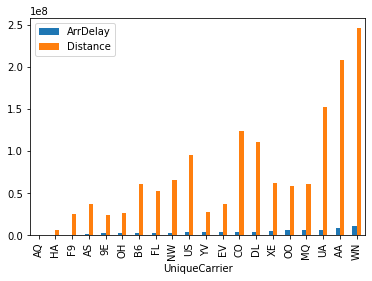

In [78]:
aerolineasdf = nuevodf[['UniqueCarrier', 'ArrDelay', 'Distance']].groupby('UniqueCarrier' ).sum()
print("Las aerolíneas con más retrasos son:")
aerolineasdf.sort_values(by='ArrDelay').plot(kind='bar')

**Quins són els vols més llargs? I els més endarrerits?**

In [79]:
print ("El vuelo más largo fue de", nuevodf['AirTime'].max(), "minutos")
print ("El vuelo con más retraso fue de", nuevodf['ArrDelay'].max(), "minutos")

El vuelo más largo fue de 1091.0 minutos
El vuelo con más retraso fue de 2461.0 minutos


### Exercici 3

Exporta el data set net i amb les noves columnes a Excel.

In [83]:
nuevodf.to_csv('DelayedFlights.csv',index=False)